In [1]:
import numpy as np
import scipy.spatial
import pandas as pd
import shapely
import shapely.geometry
import geopandas as gpd
import matplotlib.pyplot as plt

from maskrcnn.preprocess.sample_aoi import load_df, aoi_to_chip

In [2]:
IN_DIR_SHP = 'data/Shapefile/Kenya/gadm36_KEN_1.shp'
LAKE_SHP = 'data/Shapefile/Kenya/KEN_Lakes.shp'
OUT_IMG_DIR = 'data/Experiment4/aoi.csv'

In [3]:
# read shapefiles
df_shp = gpd.read_file(IN_DIR_SHP)
shp, = df_shp.loc[df_shp['NAME_1'] == 'Siaya', 'geometry'].values

In [4]:
# remove lake
lake = gpd.read_file(LAKE_SHP)
lake, = lake.loc[lake['LAKE'] == 'Lake Victoria', 'geometry'].values
shp = shp.difference(lake)

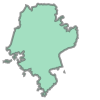

In [5]:
shp

In [6]:
df_shp = gpd.GeoDataFrame({'COUNTY': [41]}, geometry=[shp])

In [7]:
# save chip level data
df_chip = aoi_to_chip(df=df_shp, indices=['COUNTY'],
                      file_name='COUNTY{}CHIP{:08d}',
                      input_type='polygon')
df_chip.to_csv(OUT_IMG_DIR)